Testing a potential moderator
===

In this assignment we analyze interactions between alcoholconsumption per capita (explanatory numeric variable) and breast cancer detection rate PPM (response numeric variable).

Income groups segmentation is taken from World Bank Excel file [Atlas methodology by World Bank, 2014 calendar year](http://siteresources.worldbank.org/DATASTATISTICS/Resources/OGHIST.xls)
* _Low income (L)_ <= 1,045 GNI per capita in US$
* _Lower middle income (LM)_ 1,046-4,125
* _Upper middle income (UM)_ 4,126-12,735
* _High income (H)_ > 12,735

GapMinder country names are different from World Bank's, so not all the GapMinder countries could be tagged with income group lable (unlabled countries would not be analyzed)

In [1]:
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Gapminder database

In [5]:
df = pd.read_csv('../datasets/gapminder.csv', low_memory=False, index_col='country')
df = df.apply(pd.to_numeric, errors='coerce')
c_gr=pd.read_csv('../datasets/country_groups.csv',index_col='country')
c_gr['incomegroup'] = c_gr['incomegroup'].astype('category')
countries = df.join(c_gr)
countries = countries.dropna()

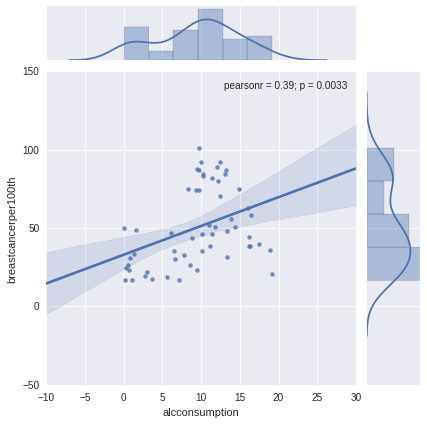

In [6]:
sns.jointplot(x='alcconsumption',y='breastcancerper100th',data=countries, kind='reg')

Although weak r=0.39, but statistically significant (p=0.003) correlation between alcohol consumption and breast cancer detection rate exists, we would like to test effects of moderation of the income per capita variable on breast cancer rate

Income | Correlation r / p-value
--------------------------------------------------
LM (0.34654220942190572, 0.40038014288856749)
UM (0.56795033683769314, 0.021728501761405981)
H (0.094416132950374529, 0.60725240932634017)


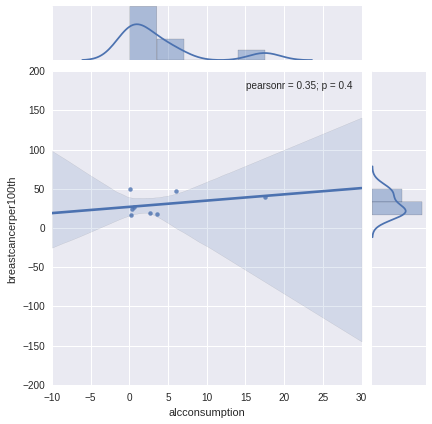

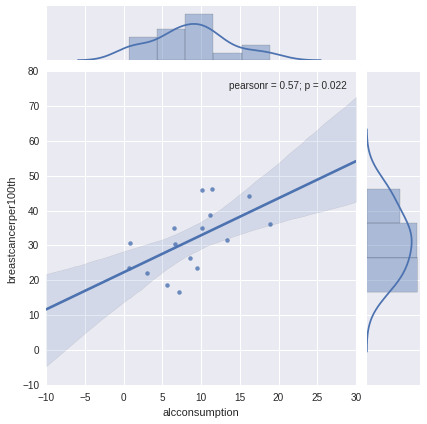

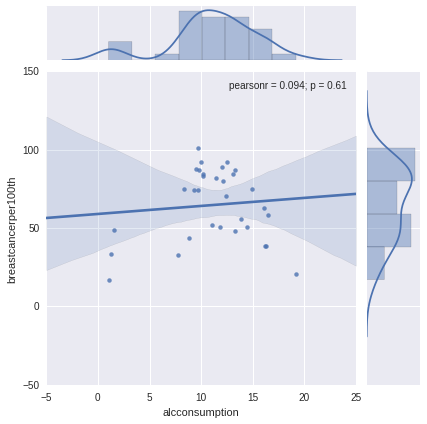

In [15]:
print "Income |", "Correlation r / p-value"
print "-"*50
for each in ["LM","UM","H"]:
    subset = countries[countries['incomegroup'] == each]
    print each, (scipy.stats.pearsonr(subset['alcconsumption'],subset['breastcancerper100th']))
    sns.jointplot(x='alcconsumption',y='breastcancerper100th',data=subset, kind='reg')

Low Middle and High income countries have insignificant correlation, while Upper Medium has mediocre statistically significant correlation
This result practically may be explained be the effects of moderation of income per person variable on breast 
cancer rate